In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Introducing an AR Model

In an Autoregressive model, or AR model, today's value equals a mean plus a fraction phi of yesterday's value, plus noise. Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. 

<img src="ar.jpg" style="max-width:800px">

If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1.

### Interpretation of AR(1) Parameter

As an example, suppose R_t is a time series of stock returns. 

<img src="ar-1.jpg" style="max-width:800px">

If phi is negative, then a positive return last period, at time t-1, implies that this period's return is more likely to be negative. This was referred to as "mean reversion". 

On the other hand, if phi is positive, then a positive return last period implies that this period's return is expected to be positive. This was referred to as "momentum".


### Comparison of AR(1) Time Series

Here are four simulated time series with different AR parameters. 

<img src="ar-2.jpg" style="max-width:800px">


- When phi equals 0.9, it looks close to a random walk. 


- When phi equals -0.9, the process looks more erratic - a large positive value is usually followed by a large negative one. 


- The bottom two are similar, but are less exaggerated and closer to white noise.


### Comparison of AR(1) Autocorrelation Functions

Here are four autocorrelation functions for different AR parameters. The autocorrelation decays exponentially at a rate of phi. 

<img src="ar-3.jpg" style="max-width:800px">

Therefore if phi is 0.9, the lag-1 autocorrelation is 0.9, the lag-2 autocorrelation is (0.9)^2 , the lag-3 autocorrelation is (0.9)^3, etc. 

When phi is negative, the autocorrelation function still decays exponentially, but the signs of the autocorrelation function reverse at each lag.


### Higher Order AR Models

So far, we've been only looking at AR(1) models. The model can be extended to include more lagged values and more phi parameters. Here we show an AR(1), an AR(2), and an AR(3).

<img src="ar-4.jpg" style="max-width:800px">

### Simulating an AR Process

Often, if you want to study and understand a pure AR process, it is useful to work with simulated data. Statsmodels provides modules for simulating AR processes. 


<img src="ar-5.jpg" style="max-width:800px">


- First, import the class, ArmaProcess. 


- Then define the order and parameters of the AR process. The convention is a little counterintuitive: You must include the zero-lag coefficient of 1, and the sign of the other coefficient is the opposite of what we have been using. For example, for an AR(1) process with phi equal to plus 0.9, the second element of the ar array should be the opposite sign, *- 0.9*. This is consistent with the time series literature in the field of signal processing. 


- You also have to input the MA parameters. You will learn about MA models in the next chapter, so for now, just ignore the MA part. 


- Then, you create an instance of the class ArmaProcess. 


- To simulate data, use the method generate_sample, with the number of simulated samples as an argument.

## Exercise 1: Simulate AR(1) Time Series

You will simulate and plot a few AR(1) time series, each with a different parameter, phi , using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive phi  and a large negative phi , but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with phi = 0.9 , the array representing the AR parameters would be ar = np.array([1, -0.9])


- Import the class ArmaProcess in the arima_process module.


- Plot the simulated AR processes:
    
    - Let ar1 represent an array of the AR parameters [1,-phi] as explained above. For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.

    - With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.

    - Simulate 1000 data points from the object you just created, AR_object1, using the method .generate_sample(). Plot the simulated data in a subplot.


- Repeat for the other AR parameter.

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess

In [3]:
# AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)

In [4]:
# AR parameter = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2,ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)

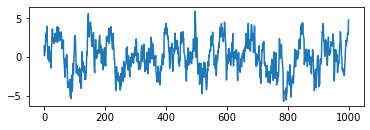

<function matplotlib.pyplot.show(close=None, block=None)>

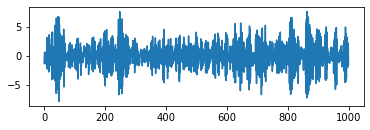

In [5]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,2)
plt.plot(simulated_data_1)
plt.show()

# Plot 1: AR parameter = -0.9
plt.subplot(2,1,2)
plt.plot(simulated_data_2)
plt.show

In [6]:
# AR parameter = +0.3
ar3 = np.array([1, 0.9])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3,ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

## Exercise 2: Compare the ACF for Several AR Time Series

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, phi = +0.9 , the first-lag autocorrelation will be 0.9, the second-lag will be (0.9)^2 = 0.81, the third-lag will be 
(0.9)^3 = 0.729, etc. 

A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be (-0.9)^2 = 0.81 , the third-lag will be (-0.9)^3 = -0.729 , etc.

The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3


- Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and suppress the confidence intervals by setting alpha=1).

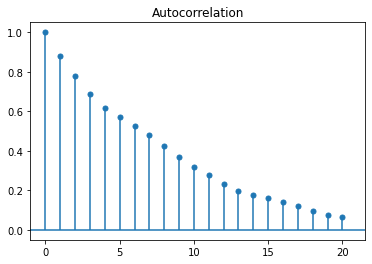

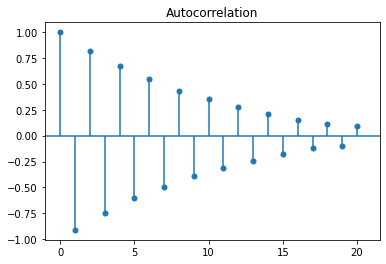

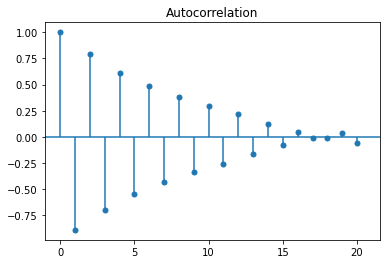

In [7]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

###  Estimating and Forecasting an AR Model

Statsmodels has another module for estimating the parameters of a given AR model. Import ARMA, which is a class, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. 

<img src="ar-6.jpg" style="max-width:600px">

The order (1,0) means you're fitting the data to an AR(1) model. An order (2,0) would mean you're fitting the data to an AR(2) model. The second part of the order is the MA part, which will be discussed in the next chapter. Once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.

<img src="ar-8.jpg" style="max-width:600px">

To see the full output, use the summary method on result. The coefficients for the mean mu and AR(1) parameter phi are highlighted in red. In the simulated data, mu was zero and phi was 0-point-9, and you can see that the estimated parameters are very close to the true parameters.

<img src="ar-9.jpg" style="max-width:600px">

If you just want to see the coefficients rather than the entire regression output, you can use the dot-params property, which returns an array of the fitted coefficients, mu and phi in this case.

### Forecasting an AR Model

To do forecasting, both in sample and out of sample, you still create an instance of the class using ARMA, and you use the fit method just as you did in the last two slides to *estimate* the parameters. But now, use the method plot_predict to do forecasting. You give it the start and end data points for fitting. If the index of the data is a DatetimeIndex object as it is here, you can pick dates for the start and end date. 

<img src="ar-7.jpg" style="max-width:600px">

The plot also gives confidence intervals around the out-of-sample forecasts. Notice how the confidence interval gets wider the farther out the forecast is.

## Exercise 3: Estimating an AR Model

You will estimate the AR(1) parameter, phi , of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true  of 0.9, you will print out the estimate of phi. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

- Import the class ARMA in the module statsmodels.tsa.arima_model. Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1)), is order=(1,0).


- Fit the model mod using the method .fit() and save it in a results object called res.


- Print out the entire summary of results using the .summary() method.


- Just print out an estimate of the constant and  using the .params attribute (no parentheses).

In [8]:
import statsmodels

In [9]:
print(statsmodels.__version__)

0.12.2


In [18]:
len(simulated_data_1)

1000

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit(disp=0)

# Print out summary information on the fit
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.830
Method:                       css-mle   S.D. of innovations              0.996
Date:                Sat, 21 May 2022   AIC                           2837.660
Time:                        17:48:19   BIC                           2852.383
Sample:                             0   HQIC                          2843.256
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0872      0.267      0.327      0.744      -0.435       0.610
ar.L1.y        0.8827      0.015     59.121      0.000       0.853       0.912
                                    Roots           

In [12]:
# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

When the true phi=0.9, the estimate of phi (and the constant) are:
[0.08720043 0.88271733]


Notice how close the estimated parameter is to the true parameter.

## Exercise 4: Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with phi = +0.9 , you will plot in-sample and out-of-sample forecasts.

- Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1) order=(1,0)


- Fit the model mod using the method .fit() and save it in a results object called res


- Plot the in-sample and out-of-sample forecasts of the data using the plot_predict() method


- Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41583D+00    |proj g|=  3.02403D-04

At iterate    5    f=  1.41583D+00    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   2.220D-08   1.416D+00
  F =   1.4158299972623103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


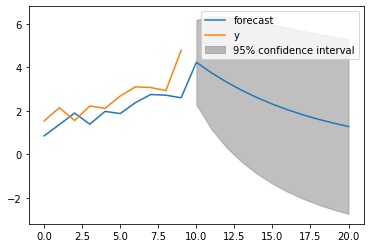

In [13]:
# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean.

In [14]:
interest_rate_data = pd.read_csv("interest_rate_data.csv")
#interest_rate_data = interest_rate_data.set_index("DATE")
interest_rate_data = interest_rate_data.rename({"Unnamed: 0": "Date", "interest": "US10Y"}, axis =1) 
interest_rate_data = interest_rate_data.set_index("Date")
interest_rate_data

,US10Y
Date,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64
1967-12-31,5.70
1968-12-31,6.16
1969-12-31,7.88
1970-12-31,6.50


## Exercise 5: Let's Forecast Interest Rates

You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.


- Create an instance of the ARMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.


- Fit the model mod using the method .fit() and save it in a results object called res.


- Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method. Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2022' to forecast several years in the future.Note that the end argument 2022 must be in quotes here since it represents a date and not an integer position.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60377D+00    |proj g|=  4.49307D-03

At iterate    5    f=  1.60243D+00    |proj g|=  6.72795D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   2.220D-08   1.602D+00
  F =   1.6024253723629804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

<Figure size 2000x800 with 0 Axes>

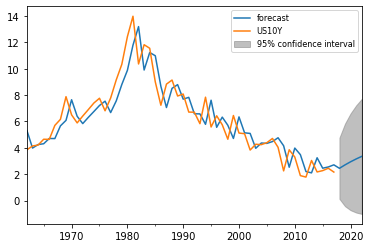

In [15]:
# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
plt.figure(figsize=(10,4), dpi=200)
res.plot_predict(start= 0, end = '2022')
plt.legend(fontsize=8)
plt.show();

According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.

## Exercise 6: Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

- Import plot_acf function from the statsmodels module Create two axes for the two subplots


- Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot


- Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

In [16]:
simulated_data = [5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482]

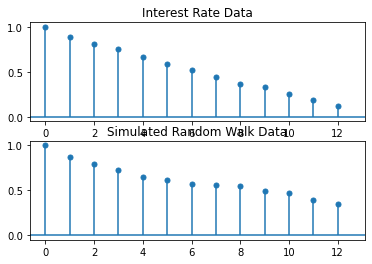

In [17]:
# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

Notice the Autocorrelation functions look very similar for the two series.